<a href="https://colab.research.google.com/github/nchaudhary1/LinearRegression_SeolBike/blob/main/finalSeoulBike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loading libraries**

In [ ]:
import pandas as pd
import numpy as np

import warnings 
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style = 'white', color_codes = True)

**Data Acquisition**

In [ ]:
data = pd.read_csv('/content/SeoulBikeData.csv')
#Showing overview of the dataset
data.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
influncer = data.columns
influncer

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
print('Factors affecting the numbers of bikes rented are ',influncer)

Factors affecting the numbers of bikes rented are  Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')


In [ ]:
#Checking the dataframe for any missing values 
data.isna().sum()

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

In [ ]:
print('There are no missing values.')

There are no missing values.


In [ ]:
#showing dimension of the dataset
data.shape

(8760, 14)

In [ ]:
from datetime import datetime
data.Date = pd.to_datetime(data.Date)
data.info()
data['Month']=pd.DatetimeIndex(data['Date']).month
data['Year']=pd.DatetimeIndex(data['Date']).year
data['tday']=pd.DatetimeIndex(data['Date']).day
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      8760 non-null   datetime64[ns]
 1   Rented Bike Count         8760 non-null   int64         
 2   Hour                      8760 non-null   int64         
 3   Temperature(C)            8760 non-null   float64       
 4   Humidity(%)               8760 non-null   int64         
 5   Wind speed (m/s)          8760 non-null   float64       
 6   Visibility (10m)          8760 non-null   int64         
 7   Dew point temperature(C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)   8760 non-null   float64       
 9   Rainfall(mm)              8760 non-null   float64       
 10  Snowfall (cm)             8760 non-null   float64       
 11  Seasons                   8760 non-null   object        
 12  Holiday             

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Year,tday
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018,30
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018,30
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018,30
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018,30


In [ ]:
#Dropping the date column
data.drop('Date', axis = 1, inplace = True)

In [ ]:
data.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Year,tday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12


In [ ]:
data['Seasons'].value_counts()

Summer    2208
Spring    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [ ]:
data['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [ ]:
#import preprocessing library from sklearn
from sklearn import preprocessing
#initialize a label encoder
label_encoder  = preprocessing.LabelEncoder()
#fit the data to the label encoder
label_encoder.fit(data['Seasons'])
#transform the column and save it back into the main dataframe
data['Seasons'] = label_encoder.transform(data['Seasons'])
#check the label encoded column in the dataframe
label_encoder.fit(data['Holiday'])
data['Holiday'] = label_encoder.transform(data['Holiday'])
label_encoder.fit(data['Functioning Day'])
data['Functioning Day'] = label_encoder.transform(data['Functioning Day'])
print(data['Seasons'].unique())
data.head()

[3 1 2 0]


,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Year,tday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1,1,2017,12
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1,1,2017,12
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1,1,2017,12
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1,1,2017,12
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1,1,2017,12


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rented Bike Count         8760 non-null   int64  
 1   Hour                      8760 non-null   int64  
 2   Temperature(C)            8760 non-null   float64
 3   Humidity(%)               8760 non-null   int64  
 4   Wind speed (m/s)          8760 non-null   float64
 5   Visibility (10m)          8760 non-null   int64  
 6   Dew point temperature(C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)   8760 non-null   float64
 8   Rainfall(mm)              8760 non-null   float64
 9   Snowfall (cm)             8760 non-null   float64
 10  Seasons                   8760 non-null   int64  
 11  Holiday                   8760 non-null   int64  
 12  Functioning Day           8760 non-null   int64  
 13  Month                     8760 non-null   int64  
 14  Year    

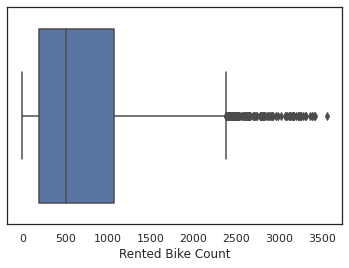

In [ ]:
sns.boxplot(data['Rented Bike Count'])


In [ ]:
data.rename(columns ={'Rented Bike Count':'RBC'}, inplace = True)


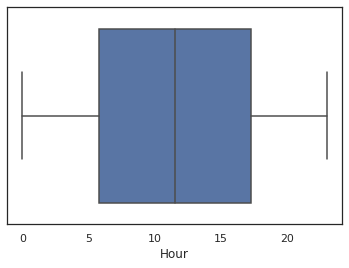

In [ ]:
sns.boxplot(data['Hour'])

In [ ]:
data['Hour'].value_counts

<bound method IndexOpsMixin.value_counts of 0        0
1        1
2        2
3        3
4        4
        ..
8755    19
8756    20
8757    21
8758    22
8759    23
Name: Hour, Length: 8760, dtype: int64>

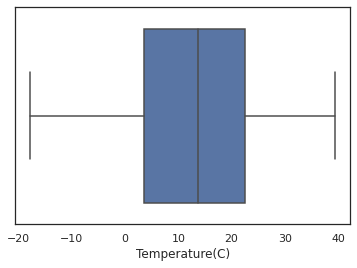

In [ ]:
sns.boxplot(data['Temperature(C)'])

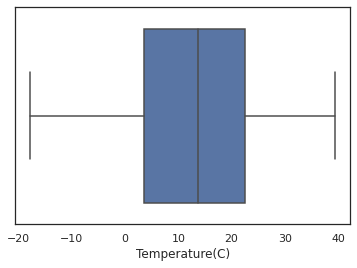

In [ ]:
sns.boxplot(data['Temperature(C)'])

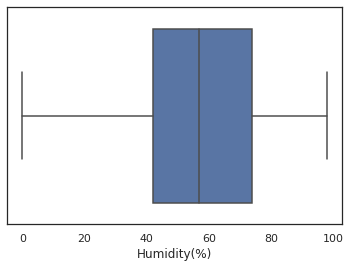

In [ ]:
sns.boxplot(data['Humidity(%)'])

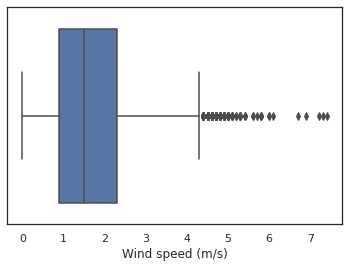

In [ ]:
sns.boxplot(data['Wind speed (m/s)'])

In [ ]:
Q1 = np.percentile(data['Wind speed (m/s)'],25,interpolation='midpoint')
Q2 = np.percentile(data['Wind speed (m/s)'],50,interpolation='midpoint')
Q3 = np.percentile(data['Wind speed (m/s)'],75,interpolation='midpoint')
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print('Low limit:',low_lim)
print('Upper limit:', up_lim)

Low limit: -1.1999999999999997
Upper limit: 4.3999999999999995


In [ ]:
data.rename(columns = {'Wind speed (m/s)':'WS'}, inplace = True)

In [ ]:
data = data[data.WS<up_lim]
data = data[data.WS>low_lim]

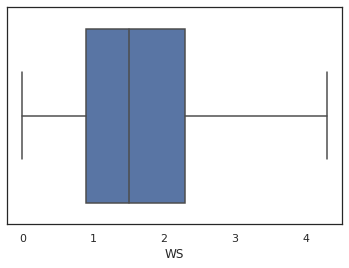

In [ ]:
sns.boxplot(data['WS'])

In [ ]:
data.columns

Index(['RBC', 'Hour', 'Temperature(C)', 'Humidity(%)', 'WS',
       'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Month', 'Year', 'tday'],
      dtype='object')

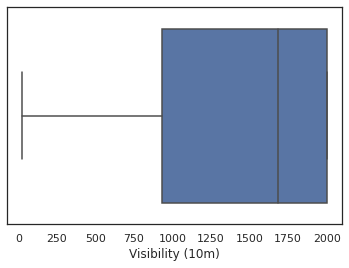

In [ ]:
sns.boxplot(data['Visibility (10m)'])

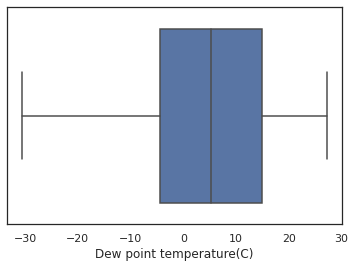

In [ ]:
sns.boxplot(data['Dew point temperature(C)'])

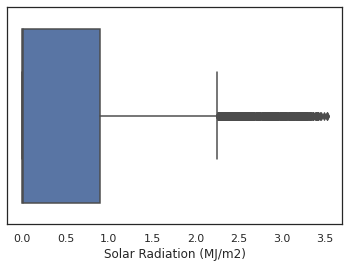

In [ ]:
sns.boxplot(data['Solar Radiation (MJ/m2)'])

In [ ]:
Q1 = np.percentile(data['Solar Radiation (MJ/m2)'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(data['Solar Radiation (MJ/m2)'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(data['Solar Radiation (MJ/m2)'], 75, interpolation = 'midpoint')     
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR
print('low limit:', low_lim) 
print('upper limit:', up_lim)

low limit: -1.35
upper limit: 2.25


In [ ]:
data.rename(columns={'Solar Radiation (MJ/m2)':'SR'}, inplace = True)

In [ ]:
data = data[data.SR<up_lim]
data = data[data.SR>low_lim]

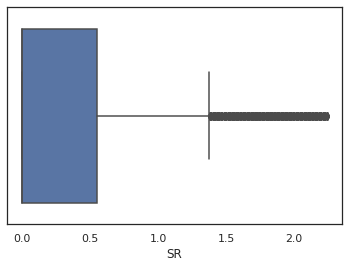

In [ ]:
sns.boxplot(data['SR'])

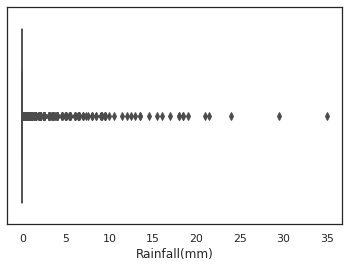

In [ ]:
sns.boxplot(data['Rainfall(mm)'])

In [ ]:
data['Rainfall(mm)']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8755    0.0
8756    0.0
8757    0.0
8758    0.0
8759    0.0
Name: Rainfall(mm), Length: 7908, dtype: float64

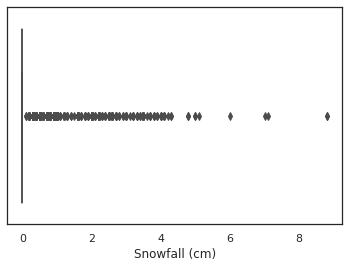

In [ ]:
sns.boxplot(data['Snowfall (cm)'])

In [ ]:
data['Snowfall (cm)']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8755    0.0
8756    0.0
8757    0.0
8758    0.0
8759    0.0
Name: Snowfall (cm), Length: 7908, dtype: float64

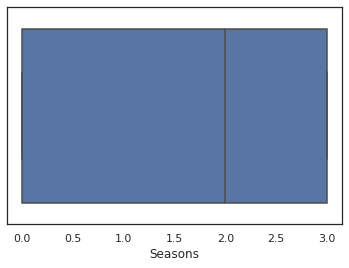

In [ ]:
sns.boxplot(data['Seasons'])

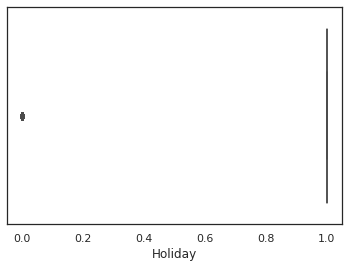

In [ ]:
sns.boxplot(data['Holiday'])

In [ ]:
data['Holiday']

0       1
1       1
2       1
3       1
4       1
       ..
8755    1
8756    1
8757    1
8758    1
8759    1
Name: Holiday, Length: 7908, dtype: int64

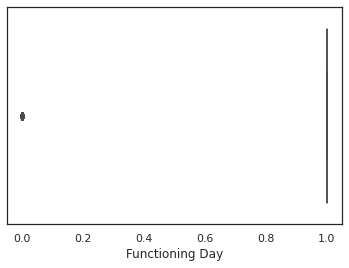

In [ ]:
sns.boxplot(data['Functioning Day'])

In [ ]:
data['Functioning Day']

0       1
1       1
2       1
3       1
4       1
       ..
8755    1
8756    1
8757    1
8758    1
8759    1
Name: Functioning Day, Length: 7908, dtype: int64

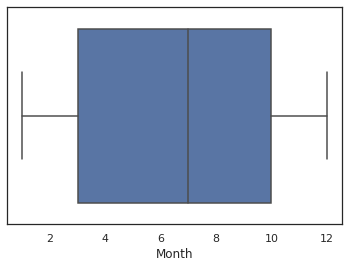

In [ ]:
sns.boxplot(data['Month'])

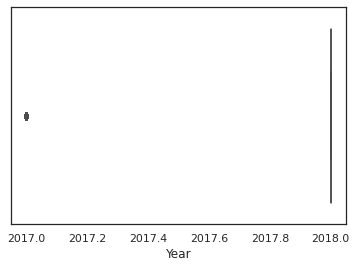

In [ ]:
sns.boxplot(data['Year'])

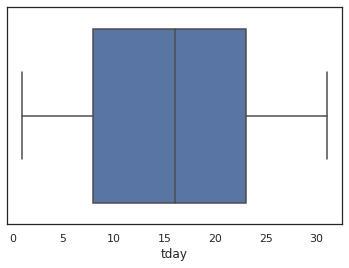

In [ ]:
sns.boxplot(data['tday'])

In [ ]:
data['tday'].value_counts

<bound method IndexOpsMixin.value_counts of 0       12
1       12
2       12
3       12
4       12
        ..
8755    30
8756    30
8757    30
8758    30
8759    30
Name: tday, Length: 7908, dtype: int64>

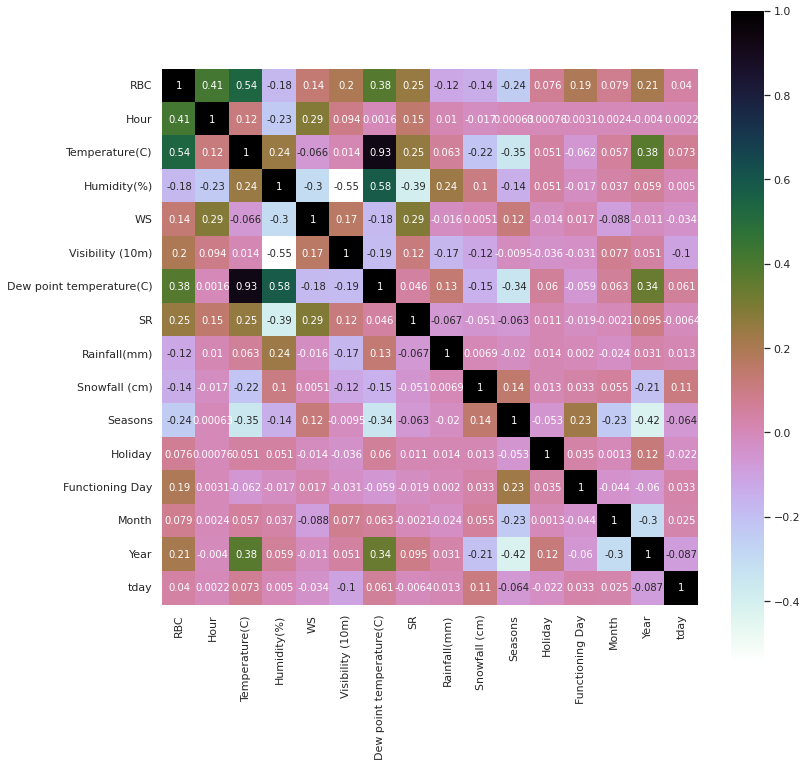

In [ ]:
#plot the corelation between variables and state your comments 
corr = data.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, annot=True, cmap='cubehelix_r', square=True)

In [ ]:
corr = corr['RBC'][:-1]
corr[abs(corr)>=0.60].sort_values(ascending=False)

RBC    1.0
Name: RBC, dtype: float64

In [ ]:
corr = corr['RBC'][:-1]
corr[abs(corr)>=0.250].sort_values(ascending = False)

IndexError: ignored

In [ ]:
'''
There is postitive corelation between the variables temperature, hour, dew point temperature, SR while negative coreration betweeb seasons, humidity, snowfall respectively.
'''

In [ ]:
data['Seasons'].unique() 

In [ ]:
data.columns

In [ ]:
related_data_cols = ['RBC', 'Hour', 'Temperature(C)','SR','Dew point temperature(C)','Seasons',]
related_data = data[related_data_cols]

In [ ]:
related_data.head()

In [ ]:
related_data

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(related_data, test_size = 0.25)

In [ ]:
train_x = train.drop(['RBC'], axis = 1)
train_y = train['RBC']

test_x = test.drop(['RBC'], axis = 1)
test_y = test['RBC']

In [ ]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
test_y.shape


In [ ]:
from sklearn.linear_model import LinearRegression
ln_reg =LinearRegression()
ln_reg.fit(train_x, train_y)


In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
prediction = ln_reg.predict(test_x)
print(r2_score(prediction, test_y))
print(mean_absolute_error(prediction, test_y))
print(mean_squared_error(prediction, test_y))

In [ ]:
#final prediction on test data
prediction_test = ln_reg.predict(test_x)

In [ ]:
#create sample submission data
submission_data = pd.DataFrame({'Pred_RBC':prediction_test})

In [ ]:
submission_data
test_y = pd.DataFrame(test_y)
test_y['Predicted'] = submission_data['Pred_RBC']
test_y


In [ ]:
ridge.fit(train_x,train_y)
ridge_score = ridge.score(test_x,test_y)
coeff_used = np.sum(ridge.coef_ != 0)
ridge.coef_